## Linear Regression
### The housing price problem
#### Deal with OS and data

In [6]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
ls


gdrive/  house_size_price.txt  sample_data/


In [10]:
!cd gdrive
!ls

gdrive	house_size_price.txt  sample_data


In [12]:
more house_size_price.txt

#### Plot data

In [18]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('house_size_price.txt' )

In [19]:
data

array([[   820.,  70000.],
       [   910.,  83000.],
       [  1100.,  75000.],
       [  1100.,  93000.],
       [  1400.,  90000.],
       [  1400.,  80000.],
       [  1500.,  85000.],
       [  1600., 114000.],
       [  1804., 150000.],
       [  2010., 160050.],
       [  2040., 170000.],
       [  2500., 175000.],
       [  3200., 180000.],
       [  3400., 190000.]])

In [20]:
x = data[:, 0]
y = data[:, 1]

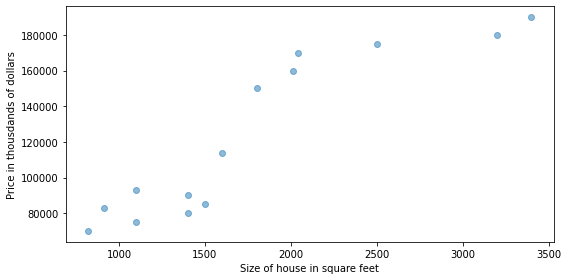

In [22]:
fig, ax  = plt.subplots(figsize=(8,4))
ax.scatter(x, y, alpha=0.5)
ax.set_xlabel('Size of house in square feet')
ax.set_ylabel('Price in thousdands of dollars')
plt.tight_layout()
plt.show()

####  Do the least squares problem.*italicized text*

In [24]:
# a column of ones
n = x.size
print(n)

14


In [27]:
ones = np.ones(shape=(n,1), dtype='float')
X = np.column_stack((ones, x))
X

array([[1.000e+00, 8.200e+02],
       [1.000e+00, 9.100e+02],
       [1.000e+00, 1.100e+03],
       [1.000e+00, 1.100e+03],
       [1.000e+00, 1.400e+03],
       [1.000e+00, 1.400e+03],
       [1.000e+00, 1.500e+03],
       [1.000e+00, 1.600e+03],
       [1.000e+00, 1.804e+03],
       [1.000e+00, 2.010e+03],
       [1.000e+00, 2.040e+03],
       [1.000e+00, 2.500e+03],
       [1.000e+00, 3.200e+03],
       [1.000e+00, 3.400e+03]])

In [30]:
XT = X.transpose()
XTX = XT.dot(X)
XTX

array([[1.4000000e+01, 2.4784000e+04],
       [2.4784000e+04, 5.2156616e+07]])

In [31]:
XTXInv = np.linalg.inv(XTX)
XTXInv

array([[ 4.49835530e-01, -2.13754738e-04],
       [-2.13754738e-04,  1.20745898e-07]])

In [35]:
b=XT.dot(y)
print("b=",b)

theta= XTXInv.dot(b)
theta


b= [1.7150500e+06 3.4642305e+09]


array([30994.74367923,    51.69155861])

####  Plot the line with points




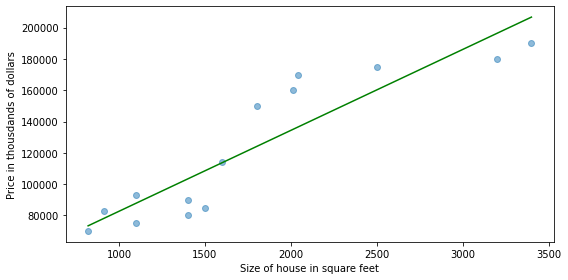

In [37]:
def f(x) : return theta[1]*x + theta[0]

fig, ax  = plt.subplots(figsize=(8,4))
ax.scatter(x, y, alpha=0.5)
ax.set_xlabel('Size of house in square feet')
ax.set_ylabel('Price in thousdands of dollars')
plt.plot(x, f(x), color='g')
plt.tight_layout()
plt.show()

#### Using the pseudoinverse

In [40]:
newTheta = np.linalg.pinv(X).dot(y)

In [41]:
newTheta

array([30994.74367923,    51.69155861])

In [42]:
newTheta-theta

array([0.00000000e+00, 7.10542736e-15])